In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm , skew
from  scipy import stats
from scipy.special import boxcox
import os 
import warnings
warnings.filterwarnings('ignore')

In [233]:
train = pd.read_csv('../../data/train.csv',encoding= 'big5')
test = pd.read_csv('../../data/test.csv',encoding= 'big5')

In [275]:
print(train.shape,test.shape)

(100000, 132) (150000, 131)


In [276]:
data_all = pd.concat([train,test],axis=0)

In [277]:
data_all = data_all.reset_index()

In [278]:
Ans = data_all['Y1']

In [279]:
data_all = data_all.drop(['Y1'],axis=1)

In [280]:
data_all_na_col = []
na_num = []
for col in data_all.columns.tolist() :
    if data_all[col].isna().sum() == 0 :
        pass
    else :
        data_all_na_col.append(col)
        na_num.append(data_all[col].isna().sum())
        print(col,'na_num =',data_all[col].isna().sum())

ACCIDENT_HOSPITAL_REC_AMT na_num = 69005
ANNUAL_INCOME_AMT na_num = 96620
ANNUAL_PREMIUM_AMT na_num = 155189
ANNUITY_AMT na_num = 69005
APC_1ST_AGE na_num = 107496
APC_1ST_YEARDIF na_num = 107496
A_IND na_num = 198492
BMI na_num = 40337
B_IND na_num = 198492
C_IND na_num = 198492
DIEACCIDENT_AMT na_num = 69005
DIEBENEFIT_AMT na_num = 69005
DISEASES_HOSPITAL_REC_AMT na_num = 69005
EDUCATION_CD na_num = 50857
EXPIRATION_AMT na_num = 69005
FINANCETOOLS_A na_num = 156162
FINANCETOOLS_B na_num = 156162
FINANCETOOLS_C na_num = 156162
FINANCETOOLS_D na_num = 156162
FINANCETOOLS_E na_num = 156162
FINANCETOOLS_F na_num = 156162
FINANCETOOLS_G na_num = 156162
FIRST_CANCER_AMT na_num = 69005
GENDER na_num = 1695
IF_ADD_INSD_F_IND na_num = 129347
IF_ADD_INSD_G_IND na_num = 129347
IF_ADD_INSD_IND na_num = 185
IF_ADD_INSD_L_IND na_num = 129347
IF_ADD_INSD_Q_IND na_num = 129347
IF_ADD_INSD_R_IND na_num = 129347
IF_ISSUE_INSD_A_IND na_num = 49994
IF_ISSUE_INSD_B_IND na_num = 49994
IF_ISSUE_INSD_C_IND 

# FINANCETOOLS 有固定資料人都是na 可以直接新增成類別變數

In [281]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 132 entries, index to X_H_IND
dtypes: float64(30), int64(13), object(89)
memory usage: 251.8+ MB


In [282]:
def isna_ornot(df,target,new_col) :
    
    list_ = []
    
    for col in df[target].isna() :
        
        if col == True :
            
            list_.append(0)
        else :
            
            list_.append(1)
            
    df[new_col] = list_
        
    return df

In [283]:
for col in data_all_na_col :
    if data_all[col].isna().sum()  >= 2500 :
        data_all = isna_ornot(data_all,col,col+'_isna')
    else :
        pass

# List 
# Object , Int , Float _variable

In [284]:
object_list = []
int_list = []
float_list = []
for col in data_all.columns.tolist() :
    if data_all[col].dtype == 'object' :
        object_list.append(col)
    if data_all[col].dtype == 'int64'  :
        int_list.append(col)
    if data_all[col].dtype == 'float64' :
        float_list.append(col)

# Object list 

In [285]:
for col in object_list :
    if data_all[col].isna().sum() >= 2500 :
        data_all[col].replace(np.nan,'Unknow',inplace=True)
    else :
        pass

In [286]:
def replace_na_to_object (df,target) :
    df[target] = df[target].replace(np.nan(),'未知')
    
    return df

# # Drop 剩下的類別 data

In [287]:
for col in object_list :
    if data_all[col].isna().sum() > 0 :
        print(col,'na_num =',data_all[col].isna().sum())

GENDER na_num = 1695
IF_ADD_INSD_IND na_num = 185
INSD_1ST_AGE na_num = 185
X_A_IND na_num = 52
X_B_IND na_num = 52
X_C_IND na_num = 52
X_D_IND na_num = 52
X_E_IND na_num = 52
X_F_IND na_num = 52
X_G_IND na_num = 52
X_H_IND na_num = 52


In [288]:
for col in float_list :
    if data_all[col].isna().sum() > 0 :
        print(col,'na_num =',data_all[col].isna().sum())

ACCIDENT_HOSPITAL_REC_AMT na_num = 69005
ANNUAL_INCOME_AMT na_num = 96620
ANNUAL_PREMIUM_AMT na_num = 155189
ANNUITY_AMT na_num = 69005
APC_1ST_YEARDIF na_num = 107496
BMI na_num = 40337
DIEACCIDENT_AMT na_num = 69005
DIEBENEFIT_AMT na_num = 69005
DISEASES_HOSPITAL_REC_AMT na_num = 69005
EDUCATION_CD na_num = 50857
EXPIRATION_AMT na_num = 69005
FIRST_CANCER_AMT na_num = 69005
ILL_ACCELERATION_AMT na_num = 69005
ILL_ADDITIONAL_AMT na_num = 69005
INPATIENT_SURGERY_AMT na_num = 69005
INSD_LAST_YEARDIF_CNT na_num = 185
L1YR_C_CNT na_num = 220078
LEVEL na_num = 107521
LONG_TERM_CARE_AMT na_num = 69005
MARRIAGE_CD na_num = 19421
MONTHLY_CARE_AMT na_num = 69005
OCCUPATION_CLASS_CD na_num = 8885
OUTPATIENT_SURGERY_AMT na_num = 69005
PAY_LIMIT_MED_MISC_AMT na_num = 69005
POLICY_VALUE_AMT na_num = 69005
RFM_M_LEVEL na_num = 107496
TERMINATION_RATE na_num = 107496


In [289]:
len(float_list)

30

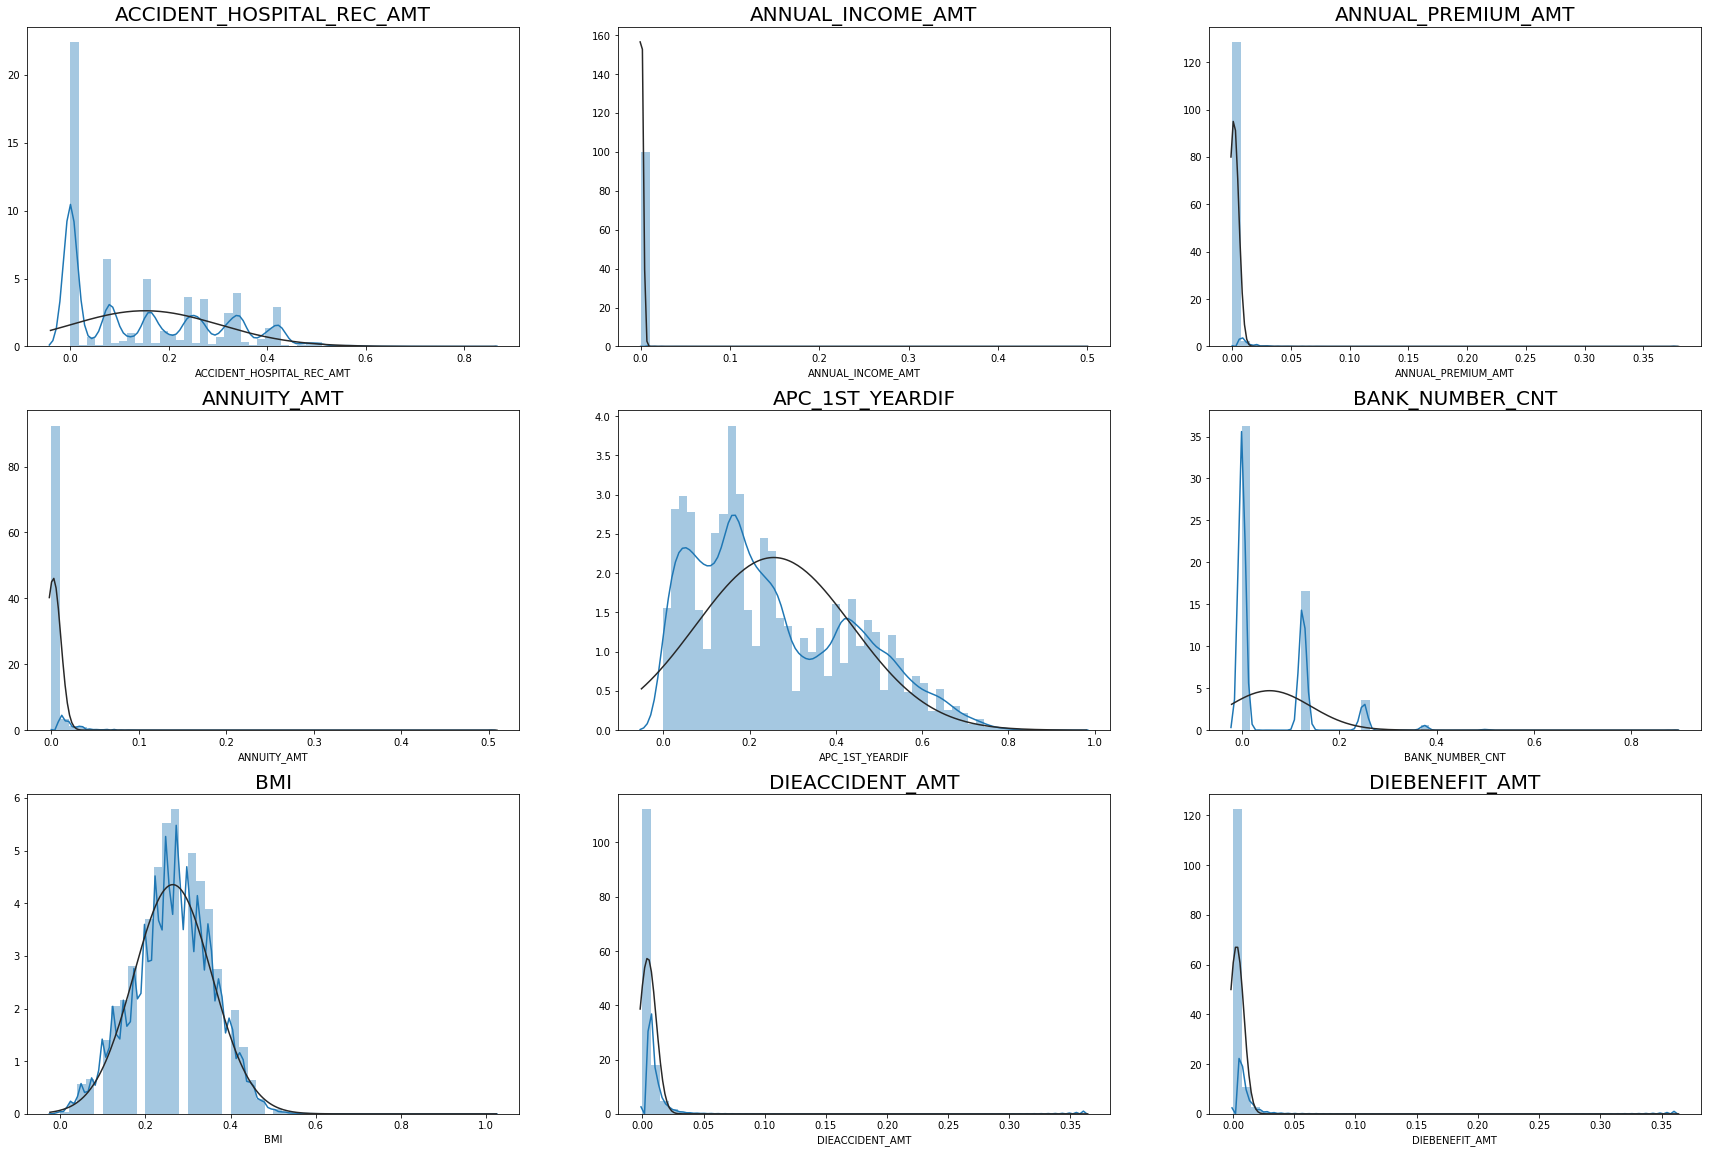

In [290]:
count = 1
plt.figure(figsize=(30,20))

for col in float_list[:9] :
    plt.subplot(3,3,count) 
    sns.distplot(data_all[col].dropna(),fit = norm)
    plt.title(col,fontsize = 20)
    
    count += 1
    
plt.show()

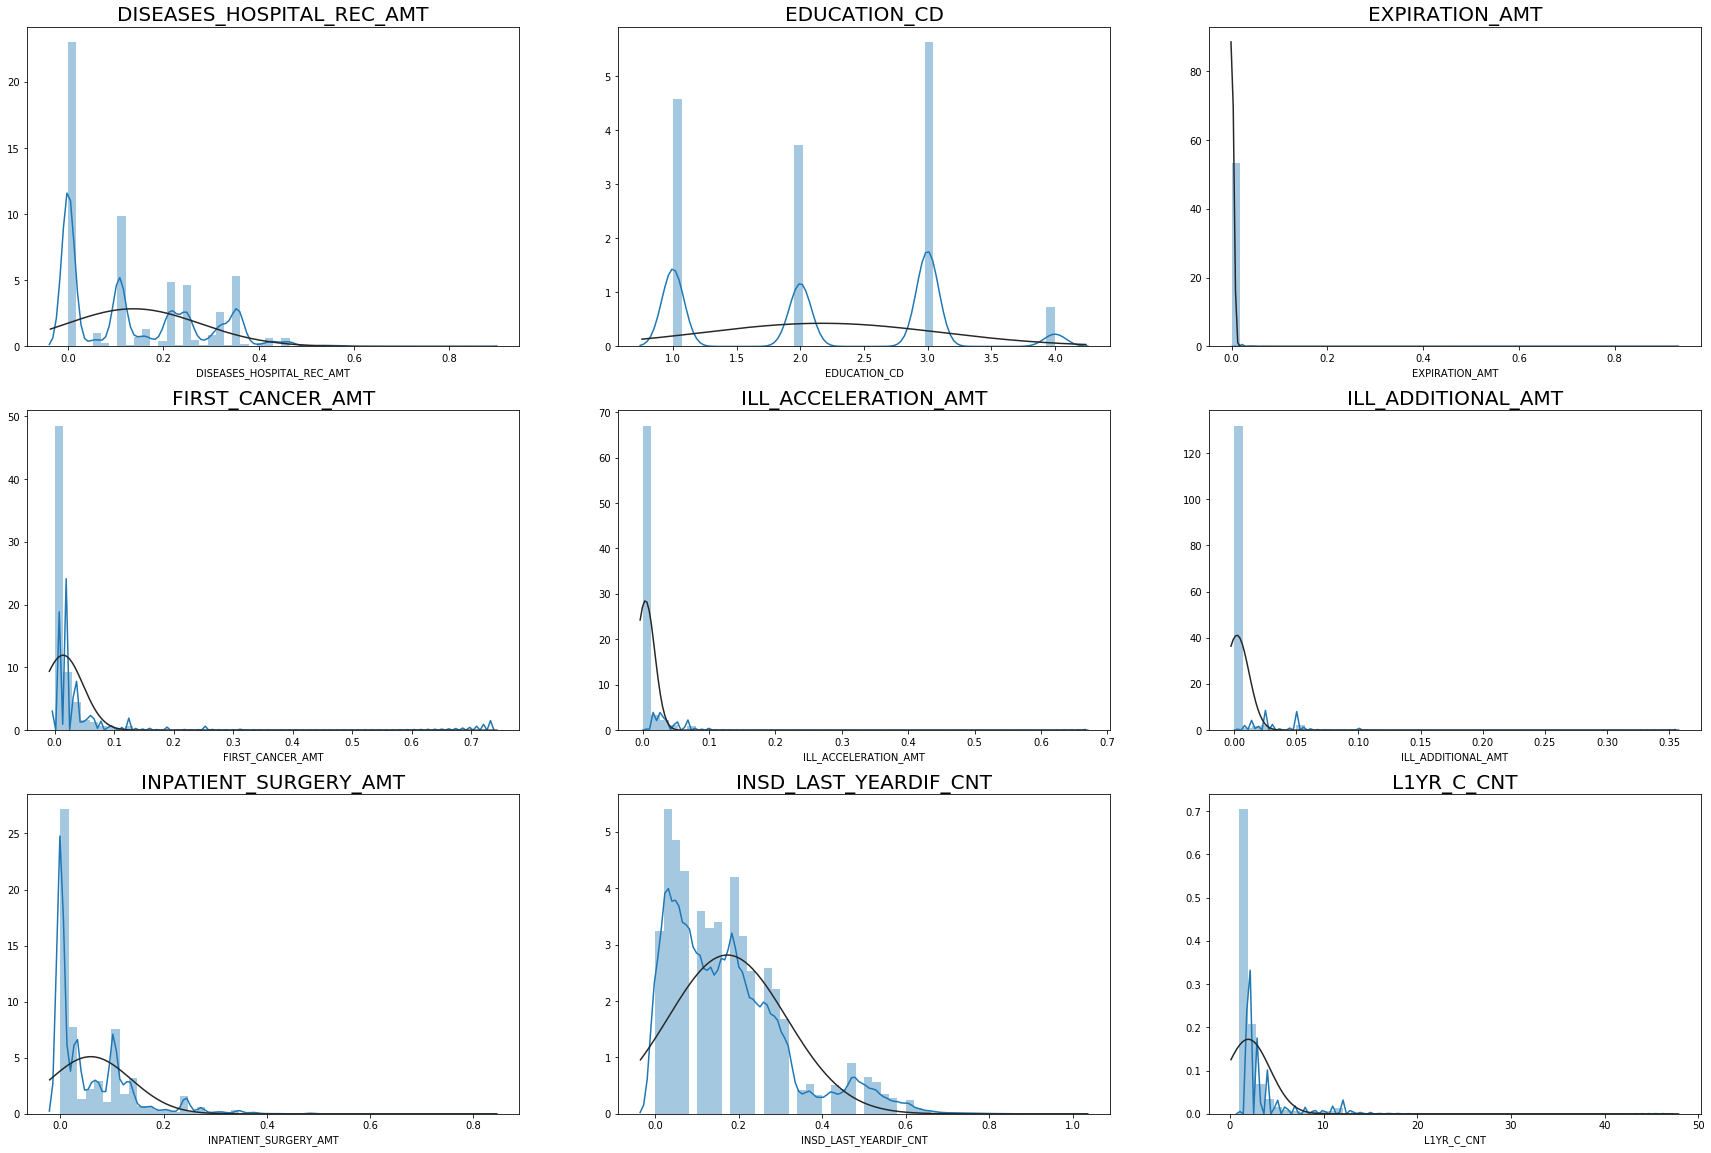

In [157]:
count = 1
plt.figure(figsize=(30,20))

for col in float_list[9:18] :
    plt.subplot(3,3,count) 
    sns.distplot(data_all[col].dropna(),fit = norm)
    plt.title(col,fontsize = 20)
    
    count += 1
    
plt.show()

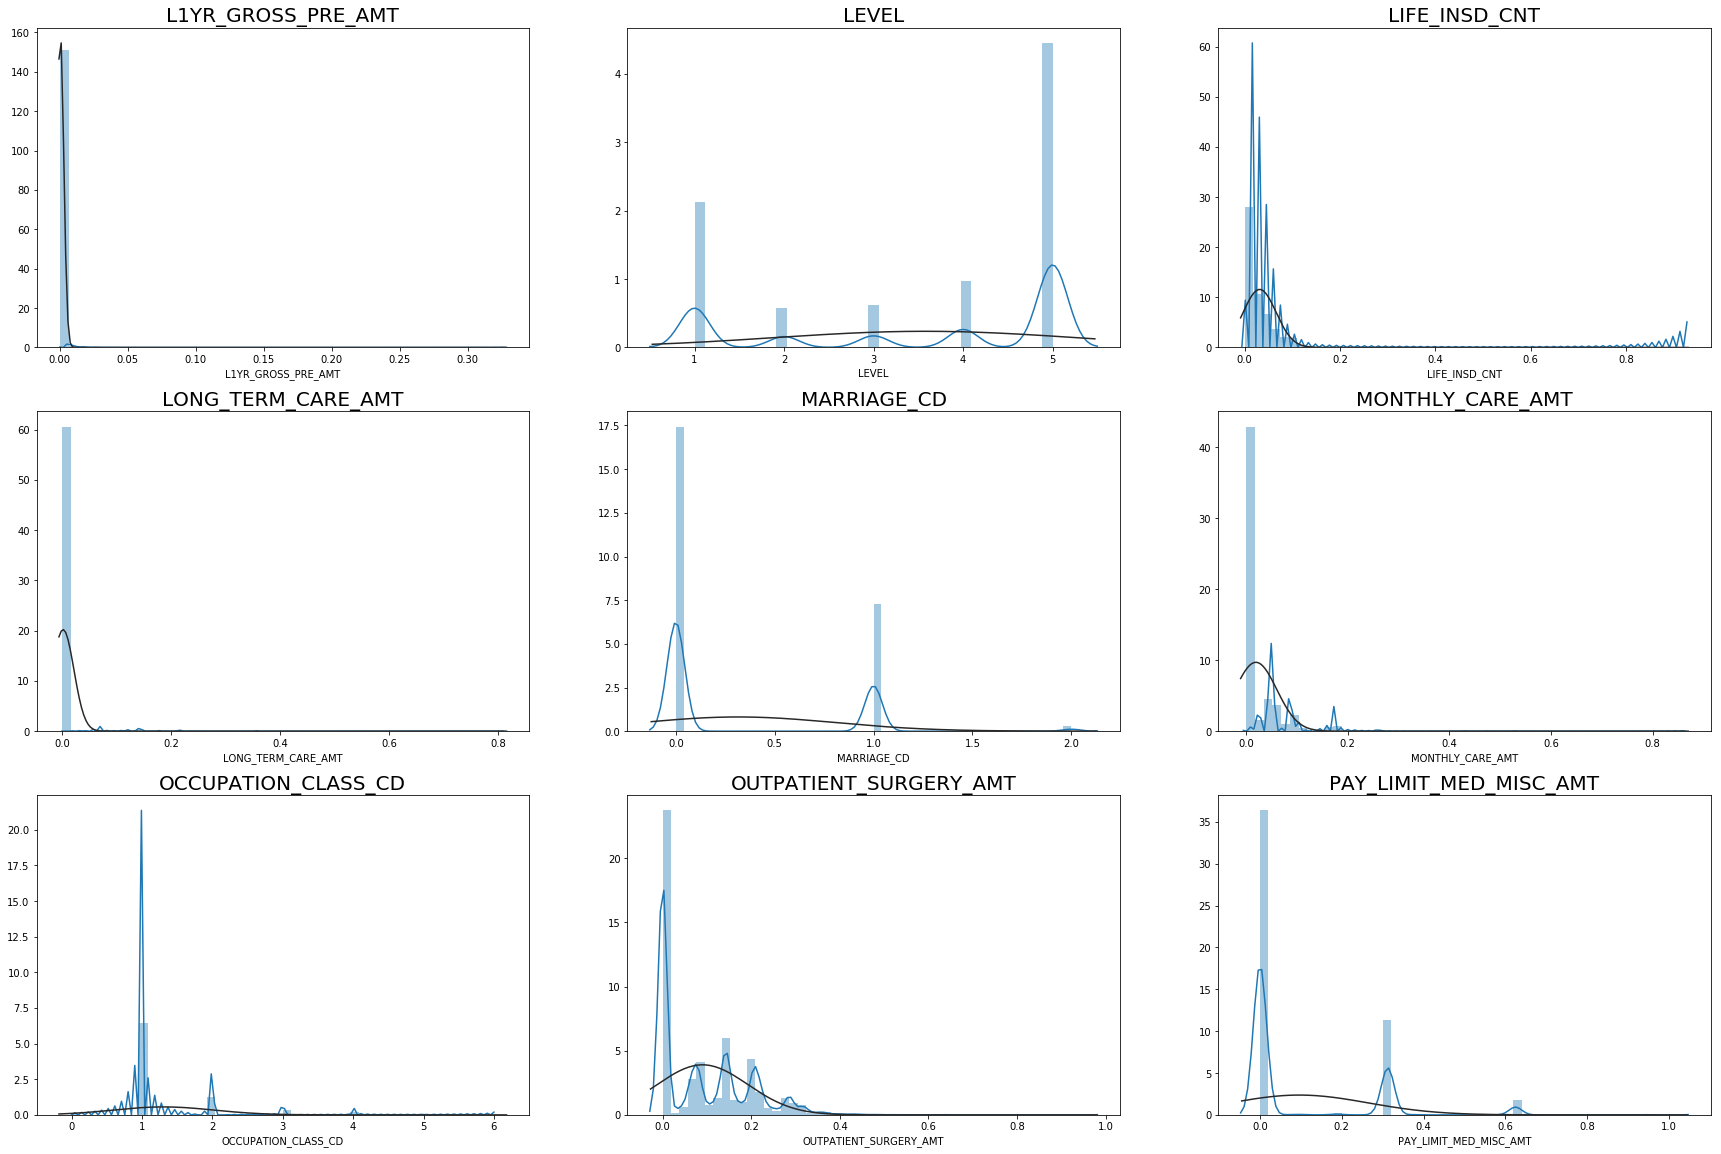

In [158]:
count = 1
plt.figure(figsize=(30,20))

for col in float_list[18:27] :
    plt.subplot(3,3,count) 
    sns.distplot(data_all[col].dropna(),fit = norm)
    plt.title(col,fontsize = 20)
    
    count += 1
    
plt.show()

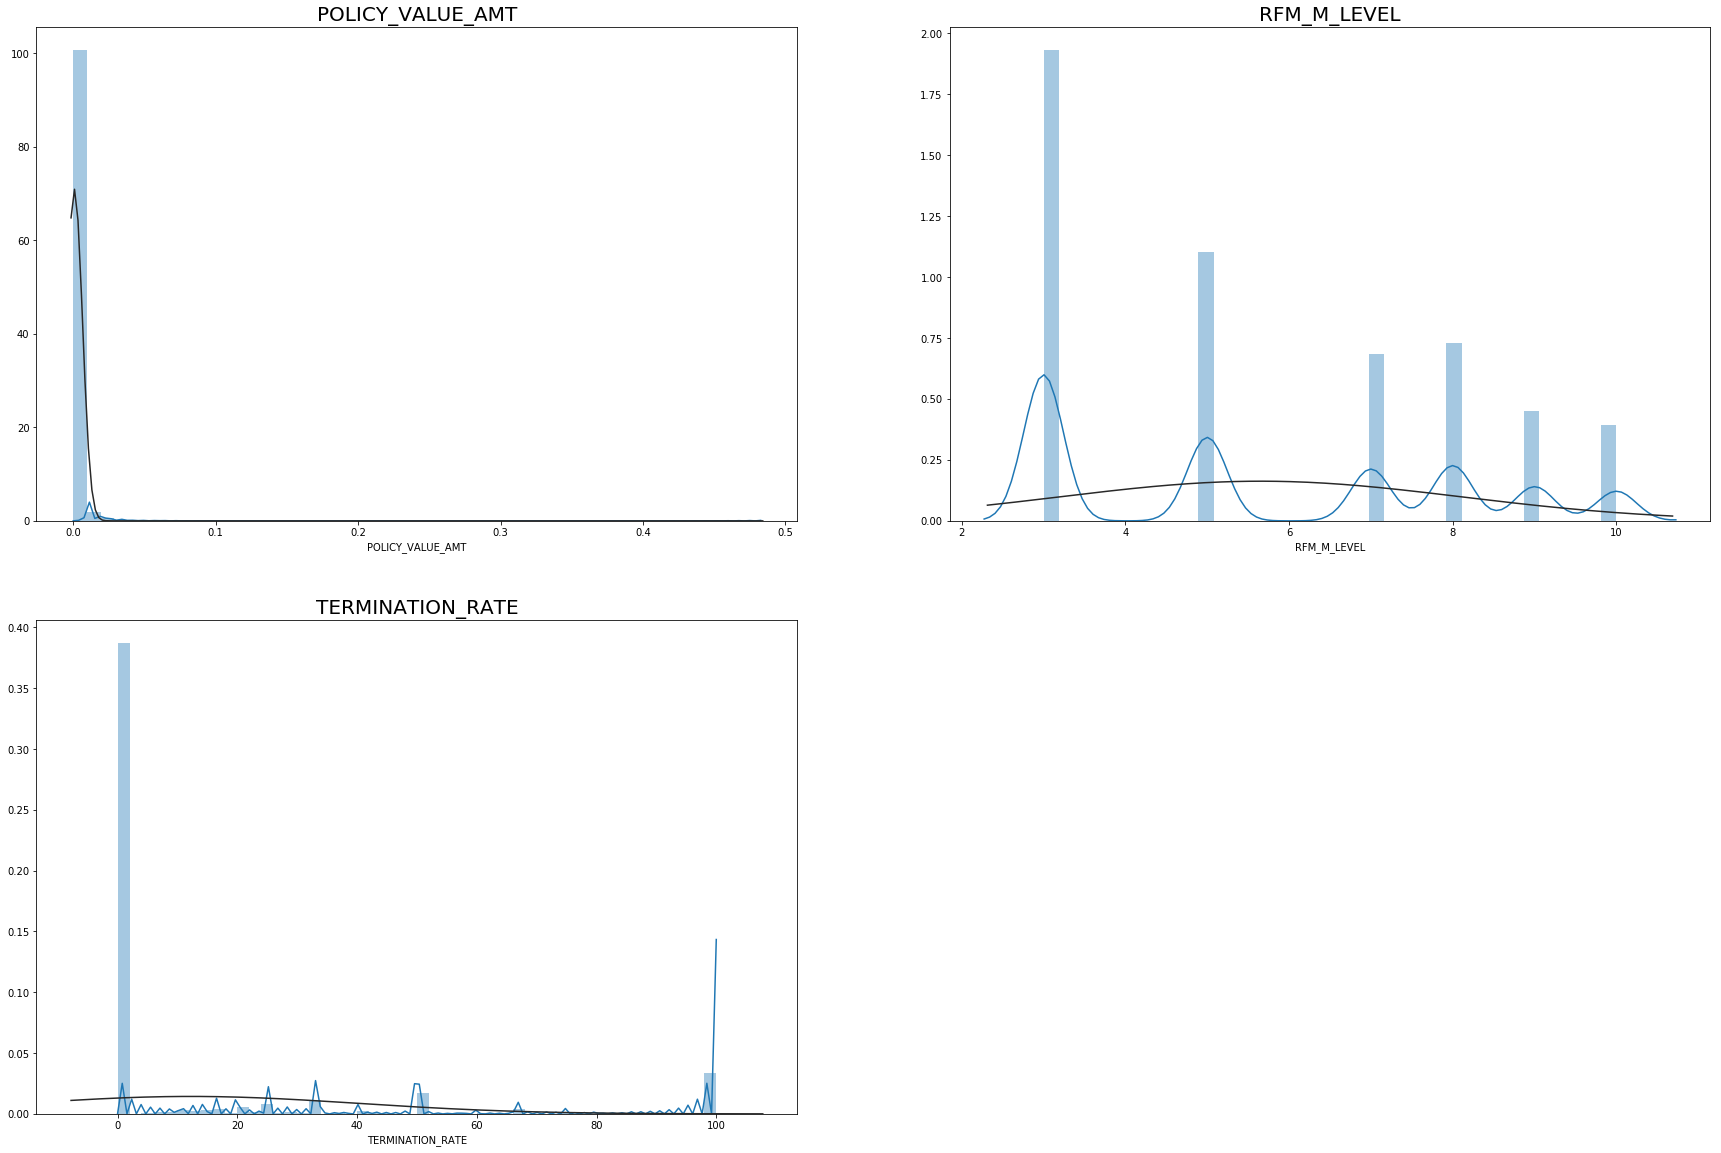

In [159]:
count = 1
plt.figure(figsize=(30,20))

for col in float_list[27:] :
    plt.subplot(2,2,count) 
    sns.distplot(data_all[col].dropna(),fit = norm)
    plt.title(col,fontsize = 20)
    
    count += 1
    
plt.show()

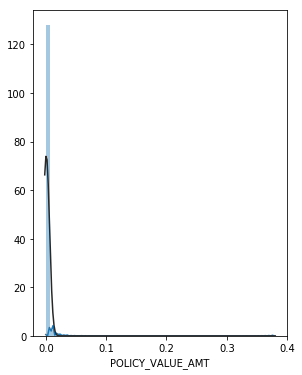

In [160]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot((train['POLICY_VALUE_AMT'].dropna()),fit= norm)
#plt.subplot(1,2,2)
#stats.probplot(boxcox(train['L1YR_GROSS_PRE_AMT'][(train['L1YR_GROSS_PRE_AMT']< 0.1)],0.15),plot=plt)
plt.show()

# 先轉換再填入Mean or Medium

In [291]:
nd_fill0_list = []
for col in float_list :
    if (data_all[col] == 0 ).sum() > 1000 :   ### 0 數量是否太多
        nd_fill0_list.append(col)
    
for col in nd_fill0_list :    
    data =(data_all[col] == 0 ).replace([True,False],[1,0])
    data_all[col+'_is0'] = data 

In [292]:
def fill_float_na (df,target,lam) :
    
    a = boxcox(df[target].dropna(),lam)
    M = a.sum() / (len(a) - len(a[a == 0]))
    df[target] = df[target].fillna(M)
    
    return df[target]

In [293]:
def fill_float_na_full (df,target,lam) :
    
    a = boxcox(df[target].dropna(),lam)
    M = a.sum() / len(a)
    t = df[target].fillna(M)
    
    return t

# 找出分配特別偏斜的columns 

# 之後做log1p or boxcox 轉換

In [294]:
tranform_list = ['ILL_ADDITIONAL_AMT','INPATIENT_SURGERY_AMT','INSD_LAST_YEARDIF_CNT','L1YR_C_CNT','L1YR_GROSS_PRE_AMT',
                'LIFE_INSD_CNT','LONG_TERM_CARE_AMT','MONTHLY_CARE_AMT','OCCUPATION_CLASS_CD','OUTPATIENT_SURGERY_AMT',
                'POLICY_VALUE_AMT','TERMINATION_RATE','LEVEL','MARRIAGE_CD','PAY_LIMIT_MED_MISC_AMT','RFM_M_LEVEL','ACCIDENT_HOSPITAL_REC_AMT', 'ANNUAL_INCOME_AMT', 'ANNUAL_PREMIUM_AMT', 'ANNUITY_AMT', 'APC_1ST_YEARDIF', 'BANK_NUMBER_CNT', 
                'BMI', 'DIEACCIDENT_AMT', 'DIEBENEFIT_AMT', 'DISEASES_HOSPITAL_REC_AMT', 'EDUCATION_CD', 'EXPIRATION_AMT', 'FIRST_CANCER_AMT', 'ILL_ACCELERATION_AMT']

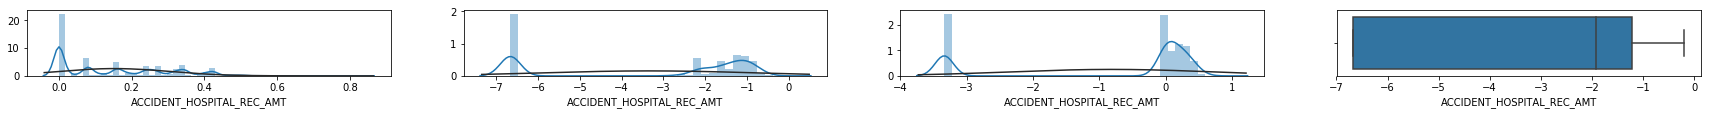

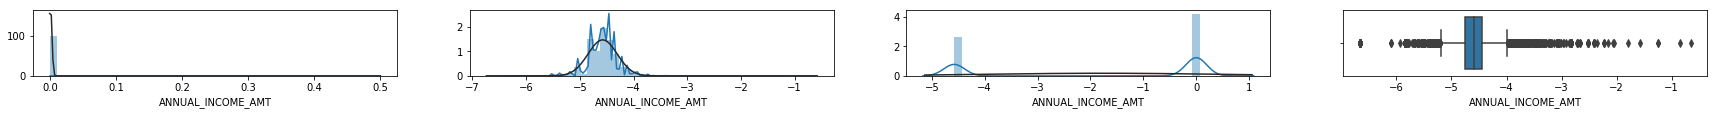

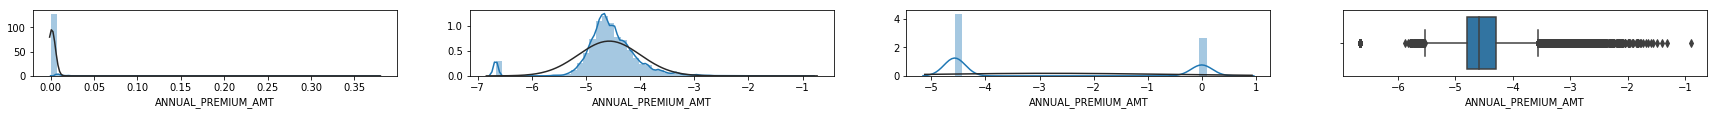

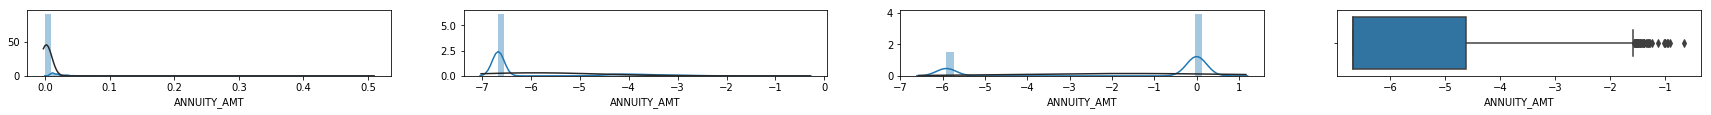

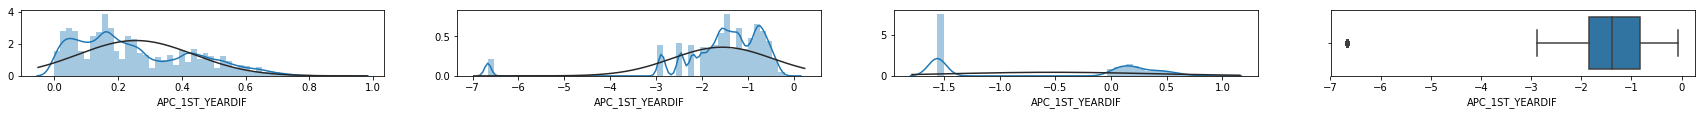

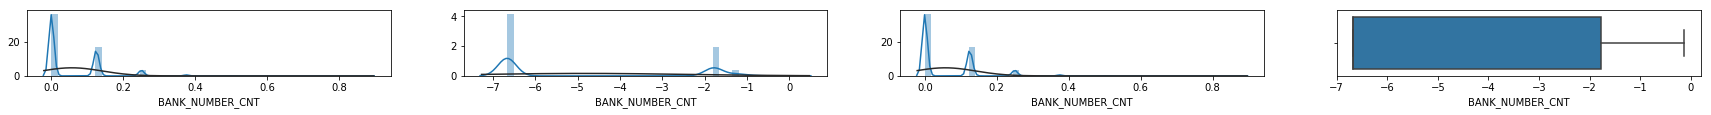

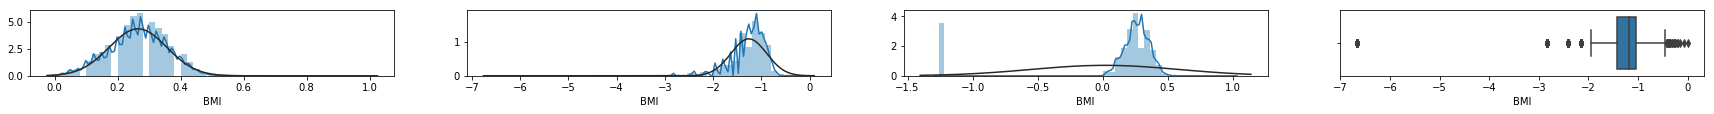

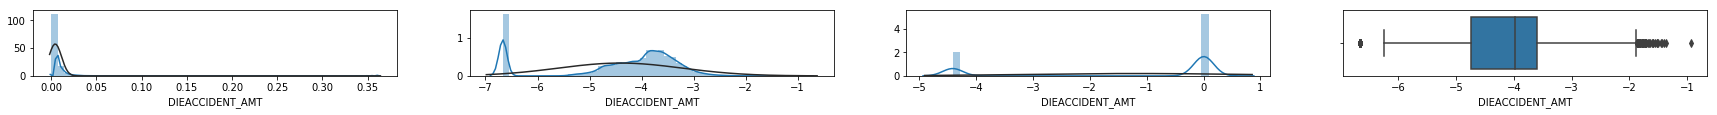

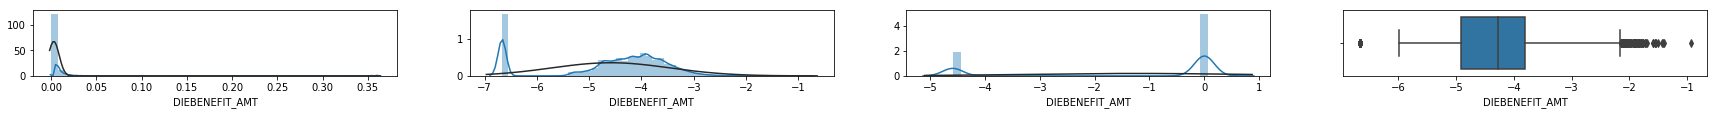

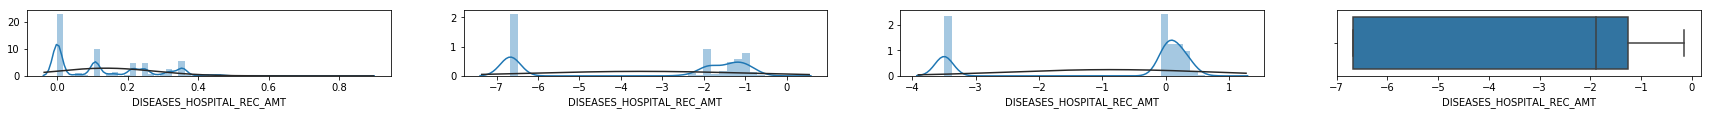

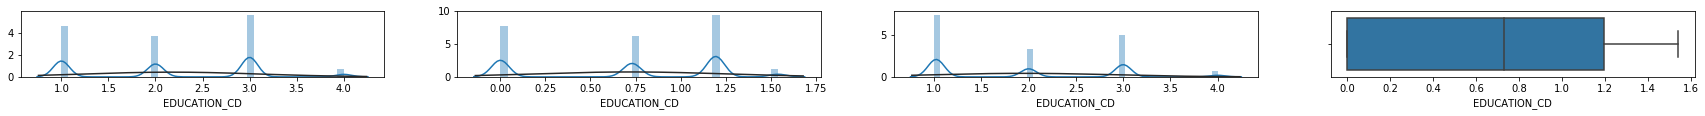

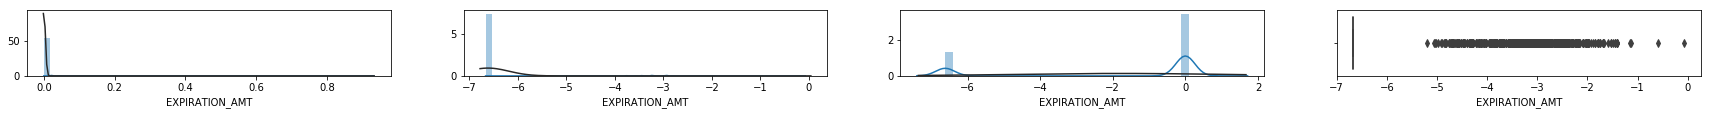

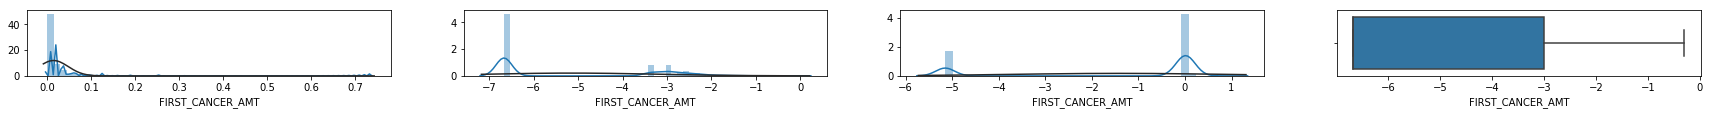

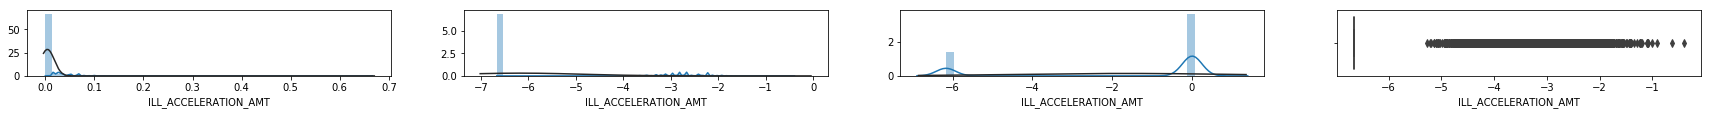

In [218]:
count_col=1
for col in tranform :
    plt.figure(figsize=(30,20))
    plt.subplot(14,4,count_col)
    sns.distplot((data_all[col].dropna(axis=0)),fit= norm)
    count_col+=1
    plt.subplot(14,4,count_col)
    sns.distplot(boxcox(data_all[col].dropna(),0.15),fit= norm)
    T = fill_float_na(data_all,col,0.15)
    count_col+=1
    plt.subplot(14,4,count_col)
    sns.distplot(T,fit= norm)
    
    
    count_col+=1
    #per = np.percentile(data_all[col],0.75)
    #filtter = data_all[col] < data_all[col].mean() + 5*data_all[col].std()
    #t = fill_float_na(data_all[filtter],col,0.15)
    plt.subplot(14,4,count_col)
    sns.boxplot(boxcox(data_all[col].dropna(),0.15))
    #sns.distplot(t,fit= norm)    
    
    count_col+=1
plt.show()

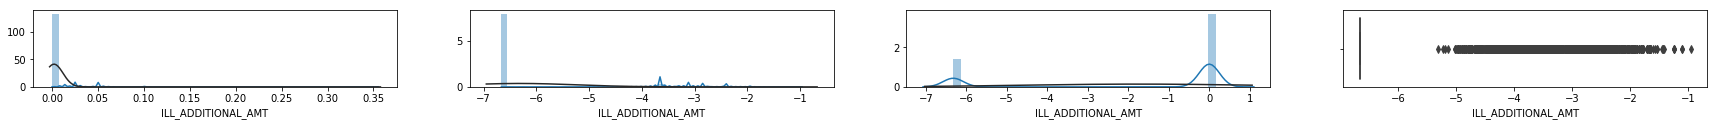

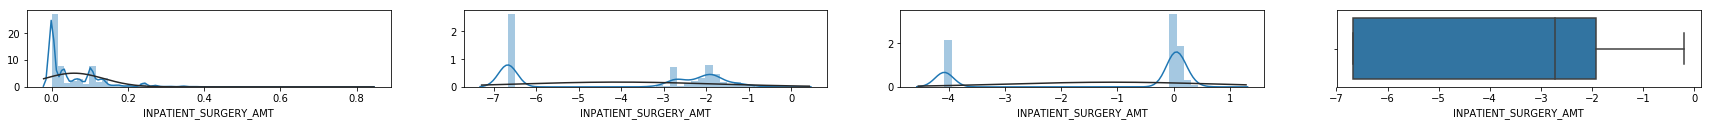

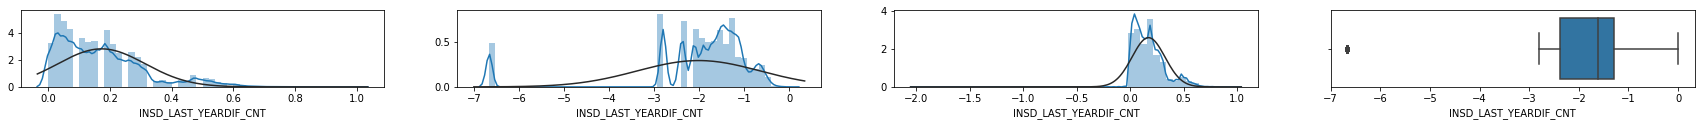

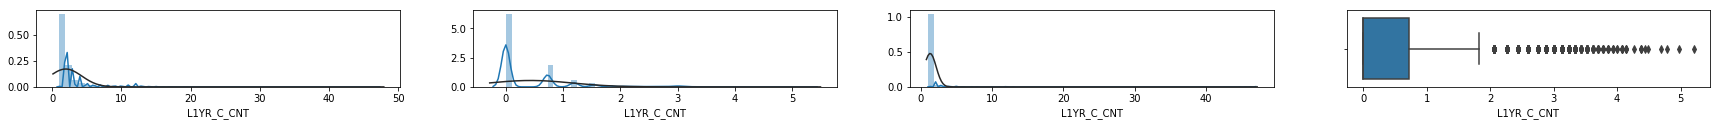

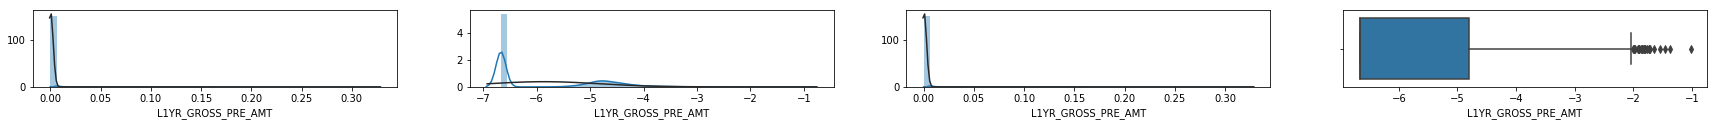

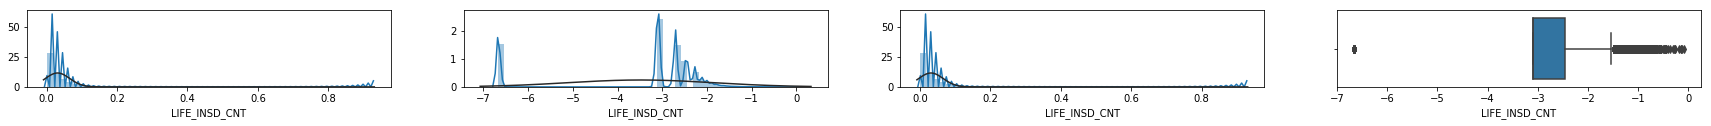

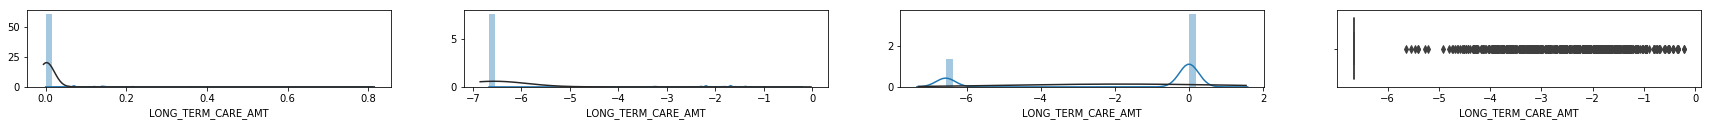

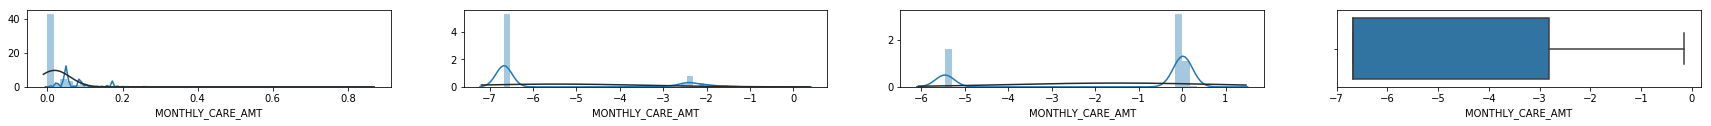

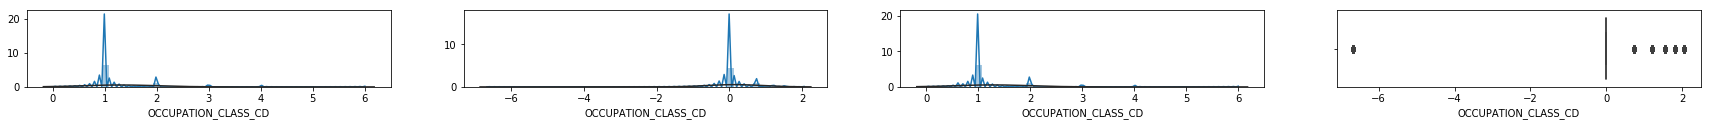

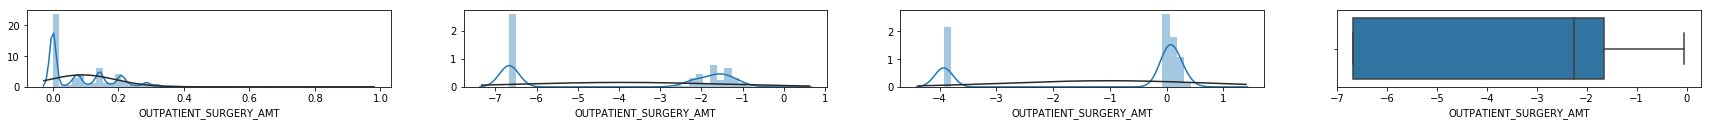

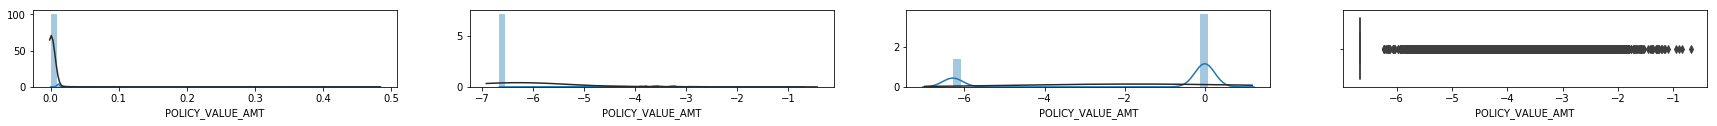

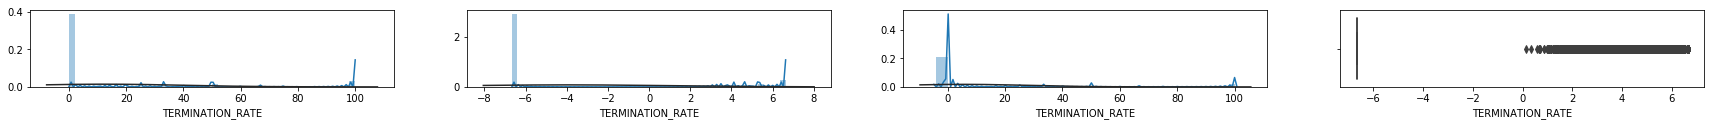

In [214]:
count_col=1
for col in tranform_list :
    plt.figure(figsize=(30,20))
    plt.subplot(12,4,count_col)
    sns.distplot((data_all[col].dropna(axis=0)),fit= norm)
    count_col+=1
    plt.subplot(12,4,count_col)
    sns.distplot(boxcox(data_all[col].dropna(),0.15),fit= norm)
    T = fill_float_na(data_all,col,0.15)
    count_col+=1
    plt.subplot(12,4,count_col)
    sns.distplot(T,fit= norm)
    
    
    count_col+=1
    #per = np.percentile(data_all[col],0.75)
    #filtter = data_all[col] < data_all[col].mean() + 5*data_all[col].std()
    #t = fill_float_na(data_all[filtter],col,0.15)
    plt.subplot(12,4,count_col)
    sns.boxplot(boxcox(data_all[col].dropna(),0.15))
    #sns.distplot(t,fit= norm)    
    
    count_col+=1
plt.show()

In [295]:
for col in tranform_list :
    data_all[col] = fill_float_na(data_all,col,0.15)

# fillna float 

In [296]:
nd_ont_list = []
nd_tar_list = []
for col in object_list :
    
    if len(data_all[col].unique()) ==3 :
        nd_ont_list.append(col)
    
    else :
        nd_tar_list.append(col)

In [297]:
data_all.shape

(250000, 217)

In [298]:
for col in nd_ont_list :
    data_all =pd.concat([data_all] + [pd.get_dummies(data_all[col],prefix=col)] ,axis=1)

In [341]:
data_all.drop(nd_ont_list,axis=1,inplace=True)

In [342]:
data_all.shape

(250000, 293)

In [430]:
data_all.to_csv('no_target.csv',encoding='big5')

# int 資料不存在na 值

In [274]:
from category_encoders.target_encoder import TargetEncoder

In [343]:
ALL = pd.concat([data_all,Ans],axis=1)

In [344]:
test_set = ALL[ALL['Y1'].isna()]
train_set = ALL[ALL['Y1'].isna()==False]

In [345]:
train_set['Y1'].replace(['Y','N'],[1,0],inplace=True)

In [346]:
target = TargetEncoder(smoothing=0.98).fit(train_set[nd_tar_list],train_set['Y1'])

In [347]:
training_ =target.transform(train_set[nd_tar_list])
testing_ = target.transform(test_set[nd_tar_list])

In [348]:
train_set[nd_tar_list] = training_
test_set[nd_tar_list] = testing_

In [349]:
train_set.dropna(inplace= True)

In [350]:
import lightgbm as light

In [408]:
lig = light.LGBMClassifier(metric = 'auc')

In [409]:
from sklearn.model_selection import KFold , cross_val_score , train_test_split

In [428]:
2000/10000

0.2

In [424]:
X , tx , Y ,ty = train_test_split(train_set.drop(['Y1','CUS_ID','index'],axis=1),train_set['Y1'],test_size=0.1)

In [425]:
kcv = KFold(n_splits=5)

In [426]:
cross_val_score(lig,X,Y,cv=kcv)

array([0.97822222, 0.97944444, 0.97827778, 0.97955556, 0.98077778])

In [423]:
lig.fit(X,Y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        metric='auc', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [422]:
lig_model.score(tx,ty)

0.97912

In [419]:
np.array(ty).reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [413]:
y_pre = lig_model.predict(tx)

In [403]:
ans2 = lig_model.predict(test_set.drop(['Y1','CUS_ID','index'],axis=1))

In [377]:
imp = lig_model.feature_importances_
imp_col = X.columns.tolist()
importance = pd.DataFrame(imp,index=imp_col)
importance.sort_values(0,ascending=False)

,0
INSD_LAST_YEARDIF_CNT,121
DIEACCIDENT_AMT,119
APC_1ST_YEARDIF,117
DIEBENEFIT_AMT,113
ANNUAL_PREMIUM_AMT,108
ANNUAL_INCOME_AMT,102
BMI,92
TOOL_VISIT_1YEAR_CNT,86
L1YR_GROSS_PRE_AMT,85
AGE,78


In [381]:
aaa = pd.DataFrame(test_set.drop('Y1',axis=1))

In [383]:
aaa.reset_index().drop('level_0',axis=1)

,index,ACCIDENT_HOSPITAL_REC_AMT,AGE,AG_CNT,AG_NOW_CNT,ANNUAL_INCOME_AMT,ANNUAL_PREMIUM_AMT,ANNUITY_AMT,APC_1ST_AGE,APC_1ST_YEARDIF,...,X_D_IND_N,X_D_IND_Y,X_E_IND_N,X_E_IND_Y,X_F_IND_N,X_F_IND_Y,X_G_IND_N,X_G_IND_Y,X_H_IND_N,X_H_IND_Y
0,0,-3.338831,0.003234,1,1,-4.576692,0.000259,-5.914176,0.033145,0.000000,...,1,0,1,0,1,0,1,0,1,0
1,1,-3.338831,0.003234,1,0,-4.576692,-4.569564,-5.914176,0.033145,0.181818,...,1,0,1,0,1,0,1,0,1,0
2,2,0.000000,0.003234,2,2,0.000083,0.000154,0.000000,0.033145,0.068182,...,1,0,1,0,1,0,1,0,1,0
3,3,-3.338831,0.003234,1,0,-4.576692,-4.569564,-5.914176,0.033145,0.159091,...,1,0,1,0,1,0,1,0,1,0
4,4,0.000000,0.003234,1,1,0.000083,0.000310,0.000498,0.033145,0.045455,...,1,0,1,0,1,0,1,0,1,0
5,5,-3.338831,0.003234,1,0,0.002500,0.002420,-5.914176,0.033145,0.022727,...,1,0,1,0,1,0,1,0,1,0
6,6,0.000000,0.003234,1,0,0.000833,0.000578,0.000498,0.033145,0.068182,...,1,0,1,0,1,0,1,0,1,0
7,7,-3.338831,0.003234,2,0,-4.576692,0.003088,-5.914176,0.033145,0.136364,...,1,0,1,0,1,0,1,0,1,0
8,8,-3.338831,0.003234,1,0,-4.576692,0.011321,-5.914176,0.033145,0.000000,...,1,0,1,0,1,0,1,0,1,0
9,9,-3.338831,0.003234,1,0,-4.576692,-4.569564,-5.914176,0.033145,0.159091,...,1,0,1,0,1,0,1,0,1,0


In [389]:
pd.DataFrame(ans,index=test.index).to_csv('ans1.csv')

In [390]:
sub = pd.read_csv('../../data/submit_test.csv',encoding= 'big5')

In [404]:
sub['Ypred'] = ans2

In [405]:
sub['Ypred'].sum()

188

In [406]:
sub.to_csv('sub2.csv',encoding='big5')

In [402]:
train['Y1'].replace(['Y','N'],[1,0]).sum()

2000

In [51]:
a = str()
for num in list(set(na_num)) :
    a = a + str(num) + ':'
    for col in data_all_na_col :
        if data_all[col].isna().sum() == num :
            a = a + str(col) + '--'
    a += ','

In [52]:
b = a.split(',')

In [53]:
group_dict = {}
for i in b[:-1] :
    list_a = i.split(':')
    group_dict[list_a[0]] = list_a[1:]

In [54]:
group_dict

{'107521': ['LEVEL--RFM_R--'],
 '156162': ['FINANCETOOLS_A--FINANCETOOLS_B--FINANCETOOLS_C--FINANCETOOLS_D--FINANCETOOLS_E--FINANCETOOLS_F--FINANCETOOLS_G--'],
 '129347': ['IF_ADD_INSD_F_IND--IF_ADD_INSD_G_IND--IF_ADD_INSD_L_IND--IF_ADD_INSD_Q_IND--IF_ADD_INSD_R_IND--'],
 '107496': ['APC_1ST_AGE--APC_1ST_YEARDIF--REBUY_TIMES_CNT--RFM_M_LEVEL--TERMINATION_RATE--'],
 '50857': ['EDUCATION_CD--'],
 '49994': ['IF_ISSUE_INSD_A_IND--IF_ISSUE_INSD_B_IND--IF_ISSUE_INSD_C_IND--IF_ISSUE_INSD_D_IND--IF_ISSUE_INSD_E_IND--IF_ISSUE_INSD_F_IND--IF_ISSUE_INSD_G_IND--IF_ISSUE_INSD_H_IND--IF_ISSUE_INSD_I_IND--IF_ISSUE_INSD_J_IND--IF_ISSUE_INSD_K_IND--IF_ISSUE_INSD_L_IND--IF_ISSUE_INSD_M_IND--IF_ISSUE_INSD_N_IND--IF_ISSUE_INSD_O_IND--IF_ISSUE_INSD_P_IND--IF_ISSUE_INSD_Q_IND--'],
 '96620': ['ANNUAL_INCOME_AMT--'],
 '69005': ['ACCIDENT_HOSPITAL_REC_AMT--ANNUITY_AMT--DIEACCIDENT_AMT--DIEBENEFIT_AMT--DISEASES_HOSPITAL_REC_AMT--EXPIRATION_AMT--FIRST_CANCER_AMT--ILL_ACCELERATION_AMT--ILL_ADDITIONAL_AMT--INPATIE

In [31]:
data_all['FINANCETOOLS_A']

0         NaN
1         NaN
2           Y
3         NaN
4         NaN
         ... 
249995    NaN
249996    NaN
249997    NaN
249998      Y
249999      N
Name: FINANCETOOLS_A, Length: 250000, dtype: object

# 經過神秘轉換的資料 要用boxcox轉換回來 ( 而且必須去除離群值，以及0太多的必須新增新特徵)

In [12]:
from category_encoders.target_encoder import TargetEncoder

# 類別變數

In [36]:
nd_target_encoding = []
nd_one_encoding = []
for col in object_list :
    if len(train[col].unique()) > 3 :
        nd_target_encoding.append(col)
    else :
        nd_one_encoding.append(col)

In [41]:
nd_target_encoding

['AGE',
 'APC_1ST_AGE',
 'CHARGE_CITY_CD',
 'CONTACT_CITY_CD',
 'CUST_9_SEGMENTS_CD',
 'INSD_1ST_AGE',
 'REBUY_TIMES_CNT',
 'RFM_R']

In [45]:
train['y1'] = train['Y1']
train['y1'].replace('Y',1,inplace=True)
train['y1'].replace('N',0,inplace=True)

In [49]:
tar = TargetEncoder(smoothing=0.9,verbose=2).fit(train[nd_target_encoding],train['y1'])

In [51]:
tar.transform(test[nd_target_encoding])

,AGE,APC_1ST_AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,CUST_9_SEGMENTS_CD,INSD_1ST_AGE,REBUY_TIMES_CNT,RFM_R
0,0.003234,0.033145,0.027251,0.019730,0.006325,0.027123,0.022464,0.053068
1,0.003234,0.033145,0.027251,0.019730,0.006325,0.006953,0.022464,0.012521
2,0.003234,0.033145,0.027251,0.019730,0.006325,0.027123,0.022464,0.025384
3,0.003234,0.033145,0.027251,0.019730,0.006325,0.027123,0.022464,0.012521
4,0.003234,0.033145,0.027251,0.019730,0.006325,0.027123,0.022464,0.053068
5,0.003234,0.033145,0.027251,0.019730,0.032659,0.027123,0.022464,0.053068
6,0.003234,0.033145,0.027251,0.019730,0.006325,0.006953,0.022464,0.025384
7,0.003234,0.033145,0.027251,0.019730,0.006325,0.027123,0.022464,0.012521
8,0.003234,0.033145,0.027251,0.019730,0.032659,0.027123,0.022464,0.053068
9,0.003234,0.033145,0.027251,0.019730,0.006325,0.006953,0.022464,0.012521
